In [1]:
# Author -- Berkant Bayraktar

In [2]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Input
from tensorflow.keras import utils
from tensorflow.keras import datasets

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
import requests
requests.packages.urllib3.disable_warnings()
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    # Legacy Python that doesn't verify HTTPS certificates by default
    pass
else:
    # Handle target environment that doesn't support HTTPS verification
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
fashion_mnist = datasets.fashion_mnist.load_data()    # Load FashionMNIST Dataset using Keras API

In [6]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


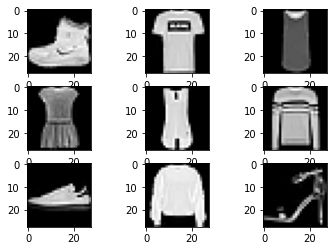

In [7]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i )
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [8]:
print('Number of classes : ' , len(set(y_train)))

Number of classes :  10


In [9]:
(x_train, x_test) = (x_train / 255, x_test / 255)

# convert x_train and y_train from (count, 28, 28) -> (count, 28, 28, 1)
x_train = x_train[...,np.newaxis]
x_test = x_test[...,np.newaxis]
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)

In [10]:
# initialize the label names
labelNames = ["top", "trouser", "pullover", "dress", "coat",
	"sandal", "shirt", "sneaker", "bag", "ankle boot"]

In [11]:
class berkantNET:
    def __init__(self, number_of_classes):
        self.model = None
        self.number_of_classes = number_of_classes
    def createModel(self):
        self.model = models.Sequential([
            Input(shape = (28,28,1)), 
            layers.Conv2D(32,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_1"),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Conv2D(64,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_2"),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Conv2D(128,(3,3), strides=(1,1), padding= 'same', activation = 'relu', use_bias=True, name = "layer_3"),
            layers.MaxPooling2D(pool_size = (2,2), strides = 2),
            layers.Flatten(),
            layers.Dropout(rate = 0.5),
            layers.Dense(512, activation= 'relu'),
            layers.Dropout(rate = 0.2),
            layers.Dense(10, activation='softmax')
        ])
    def run(self, i):
        print(self.model.predict(i))
        
        

In [12]:
bnet = berkantNET(number_of_classes=10)
bnet.createModel()

In [13]:
optimizer = optimizers.Adam(learning_rate = 0.001)
bnet.model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics= ['accuracy'])
res = bnet.model.fit(x = x_train, y = y_train, epochs=10, batch_size = 32, validation_data = (x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 216us/sample - loss: 0.4925 - accuracy: 0.8179 - val_loss: 0.3322 - val_accuracy: 0.8735
Epoch 2/10
60000/60000 [==============================] - 12s 195us/sample - loss: 0.3203 - accuracy: 0.8813 - val_loss: 0.2869 - val_accuracy: 0.8944
Epoch 3/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2788 - accuracy: 0.8977 - val_loss: 0.2494 - val_accuracy: 0.9083
Epoch 4/10
60000/60000 [==============================] - 12s 197us/sample - loss: 0.2525 - accuracy: 0.9061 - val_loss: 0.2477 - val_accuracy: 0.9081
Epoch 5/10
60000/60000 [==============================] - 12s 196us/sample - loss: 0.2349 - accuracy: 0.9126 - val_loss: 0.2387 - val_accuracy: 0.9118
Epoch 6/10
60000/60000 [==============================] - 12s 193us/sample - loss: 0.2163 - accuracy: 0.9194 - val_loss: 0.2270 - val_accuracy: 0.9200
Epoch 7/10
60000/60000 [====================

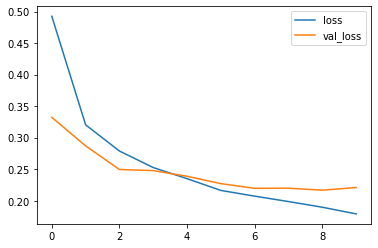

In [14]:
plt.plot(res.history['loss'], label = 'loss')
plt.plot(res.history['val_loss'], label = 'val_loss')
plt.legend()

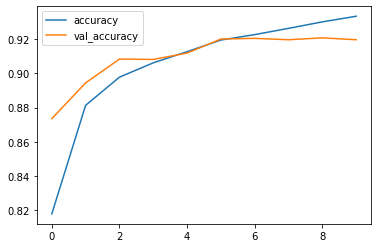

In [15]:
plt.plot(res.history['accuracy'], label = 'accuracy')
plt.plot(res.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [16]:
results = bnet.model.predict(x_test)
[np.amax(res) for res in results]

[0.99999857,
 0.9996562,
 1.0,
 1.0,
 0.82147443,
 1.0,
 0.9948001,
 0.99312395,
 1.0,
 1.0,
 0.9975389,
 0.9999682,
 0.9661656,
 0.9992778,
 0.52756417,
 1.0,
 0.9591806,
 0.6540904,
 0.9999758,
 0.99613416,
 0.99547005,
 0.96783197,
 0.99999094,
 0.97037965,
 1.0,
 0.83284765,
 0.5670172,
 0.80690885,
 0.9999374,
 0.6218027,
 1.0,
 1.0,
 0.98051274,
 0.82539093,
 1.0,
 0.98741865,
 1.0,
 0.9995604,
 0.999948,
 1.0,
 0.80579525,
 1.0,
 0.6292542,
 0.7715732,
 0.9121382,
 0.8299852,
 0.8459856,
 1.0,
 0.91305786,
 0.6408809,
 0.89390355,
 0.6470006,
 1.0,
 0.99967253,
 0.9995196,
 0.96424216,
 1.0,
 0.6366651,
 0.9993036,
 0.99999285,
 0.99986935,
 0.99991393,
 1.0,
 1.0,
 1.0,
 1.0,
 0.4763891,
 0.87354165,
 0.9313497,
 1.0,
 0.9999831,
 0.97232497,
 0.9984079,
 0.67305046,
 0.97995913,
 0.9764165,
 1.0,
 0.9993279,
 0.99998915,
 0.9986442,
 1.0,
 1.0,
 1.0,
 0.9999999,
 1.0,
 0.9997954,
 0.9885068,
 0.9999932,
 0.99999106,
 0.6102756,
 0.99999297,
 0.9814507,
 0.9922625,
 0.9999988,


In [17]:
bnet.model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Conv2D)             (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
layer_2 (Conv2D)             (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
layer_3 (Conv2D)             (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0